<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризації банківських рахунків. [Опис даних](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних
* Проведіть кластеризацію за допомогою DBSCAN


In [35]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/CC%20GENERAL.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df_numeric)

In [37]:
type(data)

pandas.core.frame.DataFrame

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

data_imputed = imputer.fit_transform(data)

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(data_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
kmeans.inertia_

2927.6030875728375

In [41]:
import matplotlib.pyplot as plt

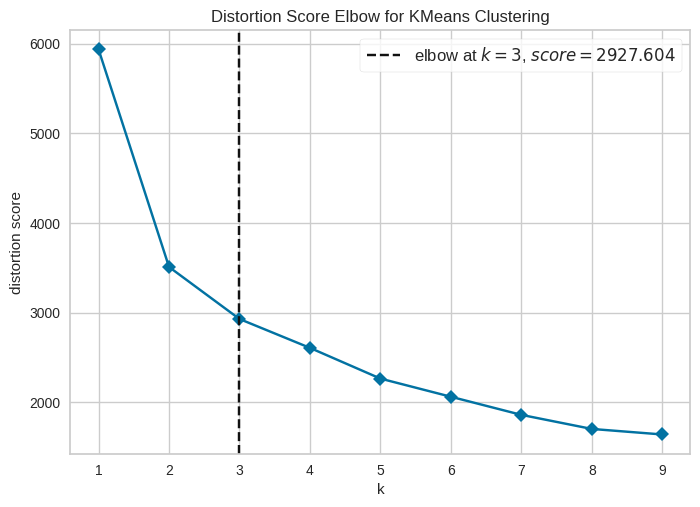

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 10),
                              timings=False,
                              metric='distortion',
                              distance_metric='euclidean'
                              )

visualizer.fit(data_imputed)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


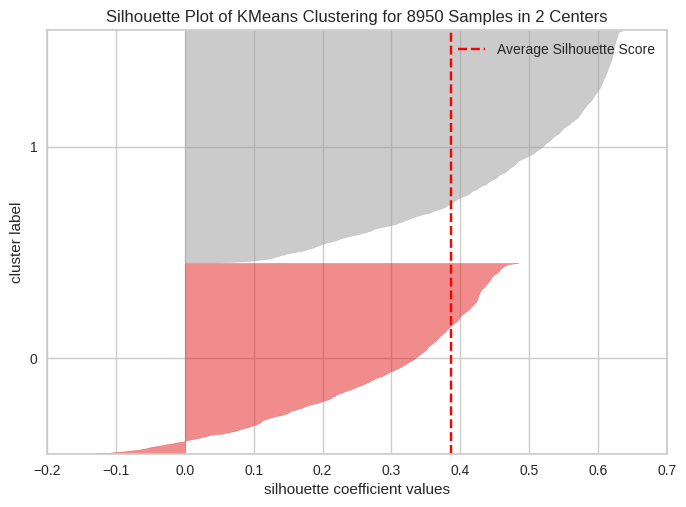

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data_imputed)
visualizer.show()

In [44]:
kmeans = KMeans(2)

kmeans.fit(data_imputed)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [45]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,4914
1,4036


In [46]:
numeric_columns = df.select_dtypes(include=['number'])

results = numeric_columns.groupby(by=df['cluster_id']).mean()

results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
cluster_id,,,,,,,,,,,,,,,,,,
0,1694.865025,0.828452,323.099733,257.384786,65.951689,1317.124216,0.159790,0.092652,0.065786,0.182307,4.311559,3.121083,4131.367368,1463.915522,846.730748,0.071056,11.449125,0.0
1,1405.719271,0.936710,1831.261440,1000.378005,831.260857,567.033711,0.892822,0.336151,0.728058,0.077721,1.954906,28.819623,4936.427218,2060.940684,884.875412,0.254355,11.600347,1.0


<Axes: xlabel='cluster_id'>

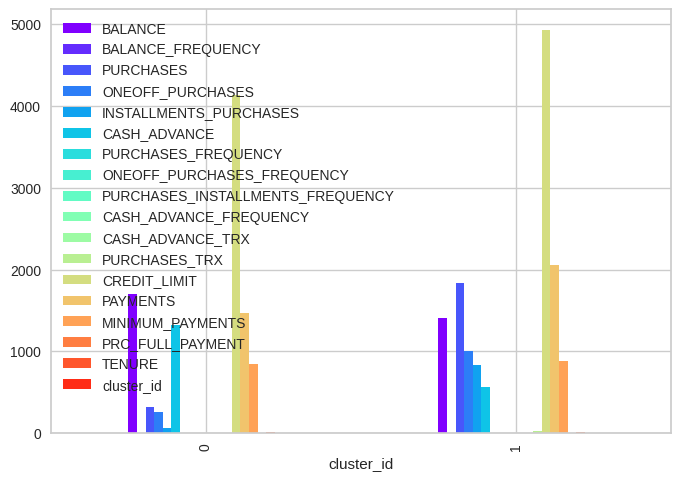

In [47]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [48]:
!pip install -q kneed

0.21891129356477598


<Figure size 500x500 with 0 Axes>

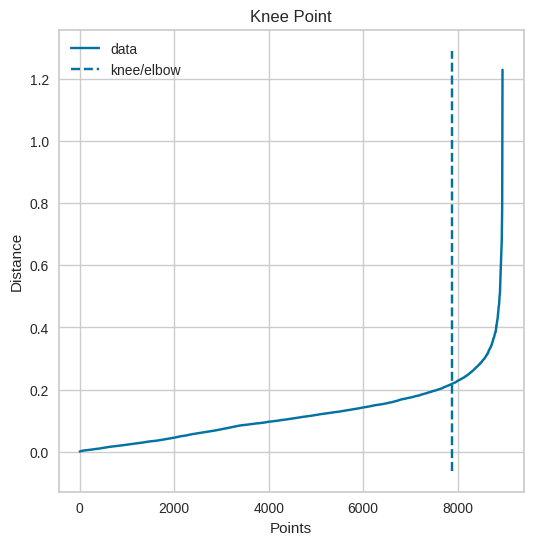

In [49]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data_imputed)
distances, indices = neighbors.kneighbors(data_imputed)
distances = np.sort(distances, axis=0)
distances = distances[:,-1]

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


print(distances[knee.knee])

In [55]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.22, min_samples=3)

dbscan.fit(data_imputed)

DBSCAN(eps=0.22, min_samples=3)

In [56]:
df['cluster_id'] = dbscan.labels_

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [57]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,8012
-1,821
6,12
13,11
4,7
18,7
10,7
20,6
7,5


In [58]:
numeric_df = df.select_dtypes(include=['number'])

results = numeric_df.groupby(by=df['cluster_id']).mean()

results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
cluster_id,,,,,,,,,,,,,,,,,,
-1,2913.262867,0.859363,3148.057540,2098.667491,1049.416845,2722.289719,0.663945,0.393747,0.458354,0.272604,8.771011,35.104750,8093.629720,5347.965837,1842.118145,0.243357,10.527406,-1.0
0,1430.850360,0.880197,776.091193,431.836961,344.586812,804.627610,0.469769,0.180610,0.353389,0.121190,2.686345,12.560160,4126.277385,1366.869298,767.579387,0.141614,11.653645,0.0
1,6146.721134,1.000000,5654.796667,4598.993333,1055.803333,1944.137805,1.000000,0.888889,0.972222,0.333333,7.666667,95.666667,12016.666667,5128.613280,2085.122615,0.000000,12.000000,1.0
2,7775.061516,1.000000,2004.966667,1363.306667,641.660000,4638.225382,1.000000,0.777778,0.972222,0.694444,24.000000,43.666667,11333.333333,3547.873666,2238.541544,0.000000,12.000000,2.0
3,142.960062,0.818182,1634.960000,1051.446667,583.513333,0.000000,0.638889,0.388889,0.250000,0.000000,0.000000,16.333333,3500.000000,1827.122492,134.566948,1.000000,12.000000,3.0
4,68.029273,1.000000,373.071429,0.000000,373.071429,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,6.000000,1285.714286,308.017676,80.170517,0.500000,6.000000,4.0
5,370.799057,1.000000,3722.895000,2493.137500,1229.757500,470.456604,0.958333,0.708333,0.791667,0.041667,0.750000,33.750000,14625.000000,3404.702430,199.715815,0.979167,12.000000,5.0
6,1012.244320,0.910714,1003.450833,1003.450833,0.000000,523.482288,0.529762,0.529762,0.000000,0.189484,2.583333,13.666667,2041.666667,265.316572,510.359937,0.000000,6.750000,6.0
7,583.512154,0.880000,1526.794000,690.898000,835.896000,307.240588,0.880000,0.300000,0.760000,0.080000,1.600000,22.800000,2200.000000,1314.246816,271.840000,0.078571,10.000000,7.0


<Axes: xlabel='cluster_id'>

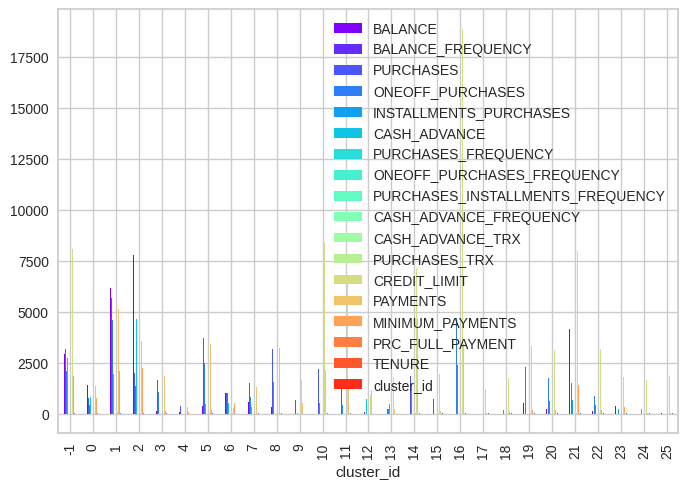

In [59]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)